# IDS Instruction: Regression
(Niklas Adams)

## Simple linear regression

First we import the packages necessary fo this instruction:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

Consider the data set "df" with feature variables "x" and "y" given below.

In [2]:
df1 = pd.DataFrame({'x': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9], 'y': [1, 3, 2, 5, 7, 8, 8, 9, 10, 12]})
print(df1)

   x   y
0  0   1
1  1   3
2  2   2
3  3   5
4  4   7
5  5   8
6  6   8
7  7   9
8  8  10
9  9  12


To get a first impression of the given data, let's have a look at its scatter plot:

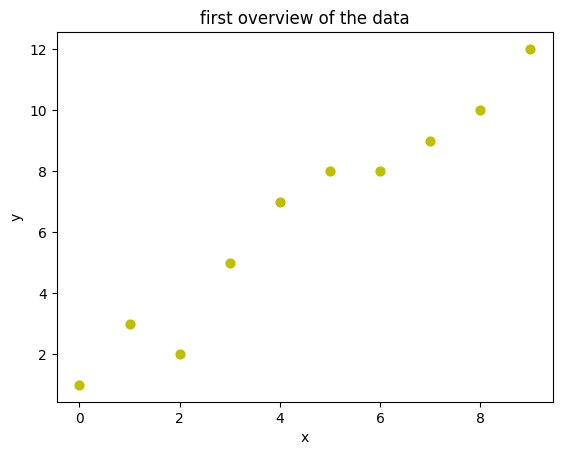

In [3]:
plt.scatter(df1.x, df1.y, color = "y", marker = "o", s = 40)
plt.xlabel('x') 
plt.ylabel('y')
plt.title('first overview of the data')
plt.show()

We can already see a linear correlation between x and y. Assume the feature x to be descriptive, while y is our target feature. We want a linear function, y=ax+b, that predicts y as accurately as possible based on x. To achieve this goal we use linear regression from the sklearn package.

In [4]:
#define the set of descriptive features (in this case only 'x' is in that set) and the target feature (in this case 'y')
descriptiveFeatures1=df1[['x']]
targetFeature1=df1['y']

#define the classifier
classifier = LinearRegression()
#train the classifier
model1 = classifier.fit(descriptiveFeatures1, targetFeature1)

Now we can use the classifier to predict y. We print the predictions as well as the coefficient and bias (*intercept*) of the linear function.

In [5]:
#use the classifier to make prediction
targetFeature1_predict = classifier.predict(descriptiveFeatures1)
print(targetFeature1_predict)
#print coefficient and intercept
print('Coefficients: \n', classifier.coef_)
print('Intercept: \n', classifier.intercept_)

[ 1.23636364  2.40606061  3.57575758  4.74545455  5.91515152  7.08484848
  8.25454545  9.42424242 10.59393939 11.76363636]
Coefficients: 
 [1.16969697]
Intercept: 
 1.2363636363636363


Let's visualize our regression function with the scatterplot showing the original data set. Herefore, we use the predicted values.

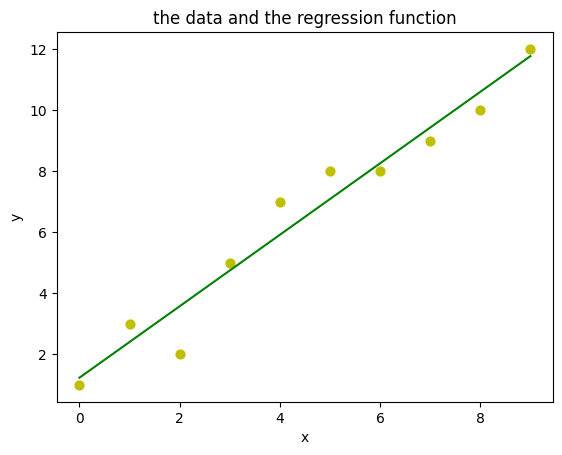

In [6]:
#visualize data points
plt.scatter(df1.x, df1.y, color = "y", marker = "o", s = 40) 
#visualize regression function
plt.plot(descriptiveFeatures1, targetFeature1_predict, color = "g") 
plt.xlabel('x') 
plt.ylabel('y') 
plt.title('the data and the regression function')
plt.show()

Since regression is a standard task, data visualization libraries such as seaborn already include the option to fit a regression into a scatter plot. This is very helpful to perform exploratory data analysis.

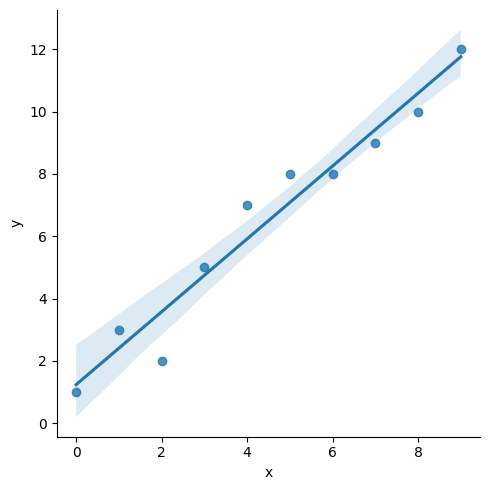

In [7]:
import seaborn as sns
sns.lmplot(x='x', y='y',data=df1, fit_reg=True) 

### <span style="color:green"> Now it is your turn. </span> Build a simple linear regression for the data below. Use col1 as descriptive feature and col2 as target feature. Also plot your results.

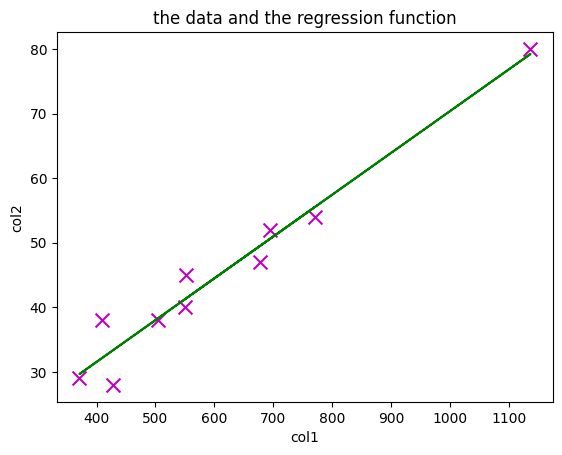

In [7]:
df2 = pd.DataFrame({'col1': [770, 677, 428, 410, 371, 504, 1136, 695, 551, 550], 'col2': [54, 47, 28, 38, 29, 38, 80, 52, 45, 40]})

#your turn - solution
descriptiveFeatures2 = df2[['col1']]
targetFeature2 = df2['col2']

#define the classifier
classifier = LinearRegression()
#train the classifier
model2 = classifier.fit(descriptiveFeatures2, targetFeature2)

#use the classifier to make prediction
targetFeature2_predict = classifier.predict(descriptiveFeatures2)

#visualize data points
plt.scatter(df2.col1, df2.col2, color = "m", marker = "x", s = 100) 
#visualize regression function
plt.plot(descriptiveFeatures2, targetFeature2_predict, color = "g") 
plt.title('the data and the regression function')
plt.xlabel('col1') 
plt.ylabel('col2') 
plt.show()

### Evaluation

Usually, the model and its predictions is not sufficient. In the following we want to evaluate our classifiers. 

Let's start by computing their error. The sklearn.metrics package contains several errors such as

* Mean squared error
* Mean absolute error
* Mean squared log error
* Median absolute error


In [8]:
#computing the squared error of the first model
print("Mean squared error model 1: %.2f" % mean_squared_error(targetFeature1, targetFeature1_predict))

Mean squared error model 1: 0.56


We can also visualize the errors:

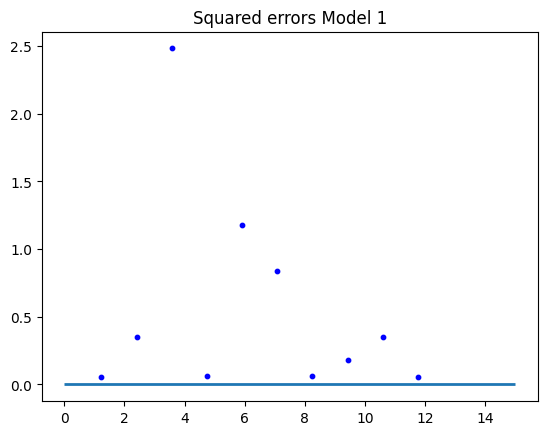

In [9]:
plt.scatter(targetFeature1_predict, (targetFeature1 - targetFeature1_predict) ** 2, color = "blue", s = 10,) 
  
## plotting line to visualize zero error 
plt.hlines(y = 0, xmin = 0, xmax = 15, linewidth = 2) 
  
## plot title 
plt.title("Squared errors Model 1") 
  
## function to show plot 
plt.show() 

### <span style="color:green"> Now it is your turn. </span> Compute the mean squared error and visualize the squared errors. Play around using different error metrics.

Mean squared error Model 2: 8.89
Mean absolute error Model 2: 2.32


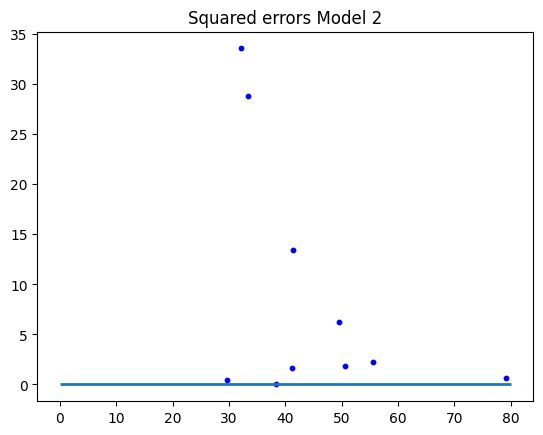

In [10]:
#Your turn
print("Mean squared error Model 2: %.2f" % mean_squared_error(targetFeature2, targetFeature2_predict))
print("Mean absolute error Model 2: %.2f" % mean_absolute_error(targetFeature2, targetFeature2_predict))

plt.scatter(targetFeature2_predict, (targetFeature2 - targetFeature2_predict) ** 2, color = "blue", s = 10,) 
  
## plotting line for zero error 
plt.hlines(y = 0, xmin = 0, xmax = 80, linewidth = 2) 
  
## plot title 
plt.title("Squared errors Model 2") 
  
## function to show plot 
plt.show()

## Handling multiple descriptive features at once - Multiple linear regression
In most cases, we will have more than one descriptive feature . As an example we use an example data set of the scikit package. The dataset describes housing prices in Boston based on several attributes. Note, in this format the data is already split into descriptive features and a target feature. Also note, the warning given by the library. We will discuss this in responsible data science.

In [11]:
from sklearn import datasets ## imports datasets from scikit-learn
df3 = datasets.load_boston()

#The sklearn package provides the data splitted into a set of descriptive features and a target feature.
#We can easily transform this format into the pandas data frame as used above.
descriptiveFeatures3 = pd.DataFrame(df3.data, columns=df3.feature_names)
targetFeature3 = pd.DataFrame(df3.target, columns=['target'])
print('Descriptive features:')
print(descriptiveFeatures3.head())
print('Target feature:')
print(targetFeature3.head())

Descriptive features:
      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33  
Target feature:
   target
0    24.0
1    21.6
2    34.7
3    33.4
4    36.2


/opt/conda/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.


To predict the housing price we will use a Multiple Linear Regression model. In Python this is very straightforward: we use the same function as for simple linear regression, but our set of descriptive features now contains more than one element (see above).

In [12]:
classifier = LinearRegression()
model3 = classifier.fit(descriptiveFeatures3,targetFeature3)

targetFeature3_predict = classifier.predict(descriptiveFeatures3)
print('Coefficients: \n', classifier.coef_)
print('Intercept: \n', classifier.intercept_)
print("Mean squared error: %.2f" % mean_squared_error(targetFeature3, targetFeature3_predict))

Coefficients: 
 [[-1.08011358e-01  4.64204584e-02  2.05586264e-02  2.68673382e+00
  -1.77666112e+01  3.80986521e+00  6.92224640e-04 -1.47556685e+00
   3.06049479e-01 -1.23345939e-02 -9.52747232e-01  9.31168327e-03
  -5.24758378e-01]]
Intercept: 
 [36.45948839]
Mean squared error: 21.89


As you can see above, we have a coefficient for each descriptive feature.

## Handling categorical descriptive features
So far we always encountered numerical dscriptive features, but data sets can also contain categorical attributes. The regression function can only handle numerical input. There are several ways to tranform our categorical data to numerical data (for example using one-hot encoding as explained in the lecture: we introduce a 0/1 feature for every possible value of our categorical attribute). For adequate data, another possibility is to replace each categorical value by a numerical value and adding an ordering with it. 

Popular possibilities to achieve this transformation are

* the get_dummies function of pandas
* the OneHotEncoder of scikit
* the LabelEncoder of scikit

After encoding the attributes we can apply our regular regression function.

In [13]:
#example using pandas
df4 = pd.DataFrame({'A':['a','b','c'],'B':['c','b','a'] })
one_hot_pd = pd.get_dummies(df4)
one_hot_pd

,A_a,A_b,A_c,B_a,B_b,B_c
0,1,0,0,0,0,1
1,0,1,0,0,1,0
2,0,0,1,1,0,0


In [14]:
#example using scikit
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

#apply the one hot encoder
encoder = OneHotEncoder(categories='auto')
encoder.fit(df4)
df4_OneHot = encoder.transform(df4).toarray()
print('Transformed by One-hot Encoding: ')
print(df4_OneHot)

# encode labels with value between 0 and n_classes-1
encoder = LabelEncoder()
df4_LE = df4.apply(encoder.fit_transform)
print('Replacing categories by numerical labels: ')
print(df4_LE.head())

Transformed by One-hot Encoding: 
[[1. 0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 1. 0.]
 [0. 0. 1. 1. 0. 0.]]
Replacing categories by numerical labels: 
   A  B
0  0  2
1  1  1
2  2  0


### <span style="color:green"> Now it is your turn. </span>  Perform linear regression using the data set given below. Don't forget to transform your categorical descriptive features. The rental price attribute represents the target variable. 

In [15]:
#Your turn
df5 = pd.DataFrame({'Size':[500,550,620,630,665],'Floor':[4,7,9,5,8], 'Energy rating':['C', 'A', 'A', 'B', 'C'], 'Rental price': [320,380,400,390,385] })

descriptiveFeatures5 = df5[['Size','Floor', 'Energy rating']]
descriptiveFeatures5 = pd.get_dummies(descriptiveFeatures5, columns = ["Energy rating"])
targetFeature5 = df5['Rental price']

classifier = LinearRegression()
model5 = classifier.fit(descriptiveFeatures5,targetFeature5)

targetFeature5_predict = classifier.predict(descriptiveFeatures5)

print('Coefficients: \n', classifier.coef_)
print('Intercept: \n', classifier.intercept_)
print("Mean squared error: %.2f" % mean_squared_error(targetFeature5, targetFeature5_predict))

Coefficients: 
 [  1.         -25.          68.33333333 -51.66666667 -16.66666667]
Intercept: 
 -63.33333333334855
Mean squared error: 0.00


## Predicting a categorical target value - Logistic regression

We might also encounter data sets where our target feature is categorical. Here we don't transform them into numerical values, but insetad we use a logistic regression function. Luckily, sklearn provides us with a suitable function that is similar to the linear equivalent. Similar to linear regression, we can compute logistic regression on a single descriptive variable as well as on multiple variables.

In [16]:
# Importing the dataset
iris = pd.read_csv('iris.csv')

print('First look at the data set: ')
print(iris.head())

#defining the descriptive and target features
descriptiveFeatures_iris = iris[['sepal_length']] #we only use the attribute 'sepal_length' in this example
targetFeature_iris = iris['species'] #we want to predict the 'species' of iris

from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(solver = 'liblinear', multi_class = 'ovr')
classifier.fit(descriptiveFeatures_iris, targetFeature_iris)

targetFeature_iris_pred = classifier.predict(descriptiveFeatures_iris)

print('Coefficients: \n', classifier.coef_)
print('Intercept: \n', classifier.intercept_)

First look at the data set: 
   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa
Coefficients: 
 [[-0.86959145]
 [ 0.01223362]
 [ 0.57972675]]
Intercept: 
 [ 4.16186636 -0.74244291 -3.9921824 ]


### <span style="color:green"> Now it is your turn. </span>  In the example above we only used the first attribute as descriptive variable. Change the example such that all available attributes are used.

In [17]:
#defining the descriptive and target features
descriptiveFeatures_iris = iris[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
targetFeature_iris = iris['species'] 

classifier = LogisticRegression(solver = 'liblinear', multi_class = 'ovr')
classifier.fit(descriptiveFeatures_iris, targetFeature_iris)

targetFeature_iris_pred = classifier.predict(descriptiveFeatures_iris)

print('Coefficients: \n', classifier.coef_)
print('Intercept: \n', classifier.intercept_)

Coefficients: 
 [[ 0.41021713  1.46416217 -2.26003266 -1.02103509]
 [ 0.4275087  -1.61211605  0.5758173  -1.40617325]
 [-1.70751526 -1.53427768  2.47096755  2.55537041]]
Intercept: 
 [ 0.26421853  1.09392467 -1.21470917]


### Parameter tuning

Now, the regression classifier (both logistic and non-logistic) can be tweaked using several parameters. This parameter tuning can be done in a systematic way using the functionality of several libraries, e.g., scikit-learn's GridSearchCV. These functions train the classifier for different combinations of parameters and evaluate the resulting model using cross validation. You can play with the different parameters.

In [18]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.001,0.01,0.1,1],
             'penalty':['l2','l1'],
             'class_weight':['balanced',None]}  
grid = GridSearchCV(LogisticRegression(solver = 'liblinear', multi_class = 'ovr'), param_grid, cv = 7, verbose = 3) 
grid.fit(descriptiveFeatures_iris, targetFeature_iris)
print(grid.best_params_) 

Fitting 7 folds for each of 16 candidates, totalling 112 fits
[CV 1/7] END C=0.001, class_weight=balanced, penalty=l2;, score=0.364 total time=   0.0s
[CV 2/7] END C=0.001, class_weight=balanced, penalty=l2;, score=0.455 total time=   0.0s
[CV 3/7] END C=0.001, class_weight=balanced, penalty=l2;, score=0.455 total time=   0.0s
[CV 4/7] END C=0.001, class_weight=balanced, penalty=l2;, score=0.429 total time=   0.0s
[CV 5/7] END C=0.001, class_weight=balanced, penalty=l2;, score=0.476 total time=   0.0s
[CV 6/7] END C=0.001, class_weight=balanced, penalty=l2;, score=0.524 total time=   0.0s
[CV 7/7] END C=0.001, class_weight=balanced, penalty=l2;, score=0.381 total time=   0.0s
[CV 1/7] END C=0.001, class_weight=balanced, penalty=l1;, score=0.364 total time=   0.0s
[CV 2/7] END C=0.001, class_weight=balanced, penalty=l1;, score=0.318 total time=   0.0s
[CV 3/7] END C=0.001, class_weight=balanced, penalty=l1;, score=0.318 total time=   0.0s
[CV 4/7] END C=0.001, class_weight=balanced, pen

# Support Vector Machines

Aside from regression models, the sklearn package also provides us with a function for training support vector machines. Looking at the example below we see that they can be trained in similar ways. We still use the iris data set for illustration.

In [19]:
from sklearn.svm import SVC

#define descriptive and target features as before
descriptiveFeatures_iris = iris[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
targetFeature_iris = iris['species']

#this time, we train an SVM classifier
classifier = SVC(C=1, kernel='linear', gamma = 'auto')
classifier.fit(descriptiveFeatures_iris, targetFeature_iris)

targetFeature_iris_predict = classifier.predict(descriptiveFeatures_iris)
targetFeature_iris_predict[0:5] #show the first 5 predicted values

array(['setosa', 'setosa', 'setosa', 'setosa', 'setosa'], dtype=object)

As explained in the lecture, a support vector machine is defined by its support vectors. In the sklearn package we can access them and their properties very easily:

* support_: indicies of support vectors
* support_vectors_: the support vectors
* n_support_: the number of support vectors for each class

In [20]:
print('Indicies of support vectors:')
print(classifier.support_)

print('The support vectors:')
print(classifier.support_vectors_)

print('The number of support vectors for each class:')
print(classifier.n_support_)

Indicies of support vectors:
[ 23  24  41  52  56  63  66  68  70  72  76  77  83  84  98 106 110 119
 123 126 127 129 133 138 146 147 149]
The support vectors:
[[5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [4.5 2.3 1.3 0.3]
 [6.9 3.1 4.9 1.5]
 [6.3 3.3 4.7 1.6]
 [6.1 2.9 4.7 1.4]
 [5.6 3.  4.5 1.5]
 [6.2 2.2 4.5 1.5]
 [5.9 3.2 4.8 1.8]
 [6.3 2.5 4.9 1.5]
 [6.8 2.8 4.8 1.4]
 [6.7 3.  5.  1.7]
 [6.  2.7 5.1 1.6]
 [5.4 3.  4.5 1.5]
 [5.1 2.5 3.  1.1]
 [4.9 2.5 4.5 1.7]
 [6.5 3.2 5.1 2. ]
 [6.  2.2 5.  1.5]
 [6.3 2.7 4.9 1.8]
 [6.2 2.8 4.8 1.8]
 [6.1 3.  4.9 1.8]
 [7.2 3.  5.8 1.6]
 [6.3 2.8 5.1 1.5]
 [6.  3.  4.8 1.8]
 [6.3 2.5 5.  1.9]
 [6.5 3.  5.2 2. ]
 [5.9 3.  5.1 1.8]]
The number of support vectors for each class:
[ 3 12 12]


We can also calculate the distance of the data points to the separating hyperplane by using the decision_function(X) method. Score(X,y) calculates the mean accuracy of the classification. The classification report shows metrics such as precision, recall, f1-score and support. You will learn more about these quality metrics in a few lectures.

In [21]:
from sklearn.metrics import classification_report
classifier.decision_function(descriptiveFeatures_iris)
print('Accuracy: \n', classifier.score(descriptiveFeatures_iris,targetFeature_iris))
print('Classification report: \n')
print(classification_report(targetFeature_iris, targetFeature_iris_predict))  

Accuracy: 
 0.9933333333333333
Classification report: 

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        50
  versicolor       1.00      0.98      0.99        50
   virginica       0.98      1.00      0.99        50

    accuracy                           0.99       150
   macro avg       0.99      0.99      0.99       150
weighted avg       0.99      0.99      0.99       150



The SVC has many parameters. In the lecture you learned about the concept of kernels. Scikit gives you the opportunity to try different kernel functions.
Furthermore, the parameter C tells the SVM optimization problem how much you want to avoid misclassifying each training example. You can also use the parameter tuning through GridSearchCV, please experiment a bit.

In [22]:
from sklearn.model_selection import GridSearchCV
param_grid = {'kernel': ['linear','poly','rbf','sigmoid']}  
grid = GridSearchCV(SVC(C=1), param_grid, cv = 5, verbose = 3) 
grid.fit(descriptiveFeatures_iris, targetFeature_iris)
print(grid.best_params_) 

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV 1/5] END .....................kernel=linear;, score=0.967 total time=   0.0s
[CV 2/5] END .....................kernel=linear;, score=1.000 total time=   0.0s
[CV 3/5] END .....................kernel=linear;, score=0.967 total time=   0.0s
[CV 4/5] END .....................kernel=linear;, score=0.967 total time=   0.0s
[CV 5/5] END .....................kernel=linear;, score=1.000 total time=   0.0s
[CV 1/5] END .......................kernel=poly;, score=0.967 total time=   0.0s
[CV 2/5] END .......................kernel=poly;, score=1.000 total time=   0.0s
[CV 3/5] END .......................kernel=poly;, score=0.967 total time=   0.0s
[CV 4/5] END .......................kernel=poly;, score=0.967 total time=   0.0s
[CV 5/5] END .......................kernel=poly;, score=1.000 total time=   0.0s
[CV 1/5] END ........................kernel=rbf;, score=0.967 total time=   0.0s
[CV 2/5] END ........................kernel=rbf;,

On the scikit website you can find more information about the available kernels etc. http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

### SVM for Regression Tasks

The standard SVM formulation is built for classifying data points. The problem can, however, also be reformulated for regression tasks. This is inlcuded in the SVR (Support Vector Regression) class of scikit-learn https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html

Fitting 2 folds for each of 4 candidates, totalling 8 fits
[CV 1/2] END ....................kernel=linear;, score=-1.648 total time=   0.0s
[CV 2/2] END ....................kernel=linear;, score=-0.967 total time=   0.0s
[CV 1/2] END .......................kernel=poly;, score=0.110 total time=   0.0s
[CV 2/2] END ......................kernel=poly;, score=-0.068 total time=   0.0s
[CV 1/2] END ........................kernel=rbf;, score=0.093 total time=   0.0s
[CV 2/2] END .......................kernel=rbf;, score=-0.334 total time=   0.0s
[CV 1/2] END ...................kernel=sigmoid;, score=-0.037 total time=   0.0s
[CV 2/2] END ...................kernel=sigmoid;, score=-0.420 total time=   0.0s
{'kernel': 'poly'}


<AxesSubplot:xlabel='x', ylabel='predict'>

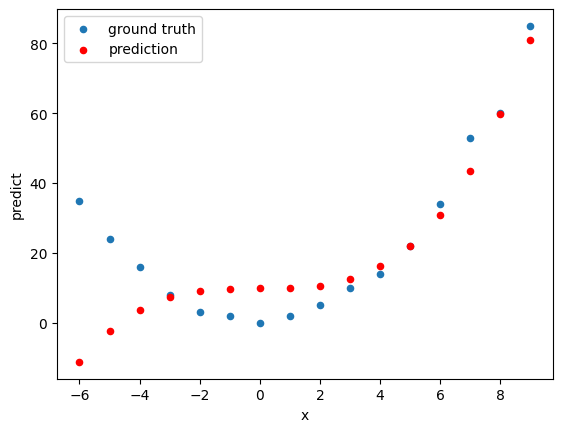

In [36]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
df1 = pd.DataFrame({'x': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, -1, -2, -3, -4, -5, -6], 'y': [0, 2, 5, 10, 14, 22, 34, 53, 60, 85, 2, 3, 8, 16, 24, 35]})
param_grid = {'kernel': ['linear','poly','rbf','sigmoid']} 
grid = GridSearchCV(SVR(), param_grid, cv = 2, verbose = 3) 
grid.fit(df1[["x"]], df1["y"])
print(grid.best_params_) 
df1["predict"] = grid.predict(df1[["x"]])
ax = df1.plot(x="x",y="y", kind= "scatter", label = "ground truth")
df1.plot(x="x",y="predict", kind= "scatter", ax = ax, color = "r", label = "prediction")

The computation time of SVR is infeasible for large datasets. An SVR with only a linear kernel is provided in the class  LinearSVR of scikit-learn https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVR.html. For many real-life use cases, this is th eonly feasible model where an SVM can be used for a regression task.

Fitting 2 folds for each of 6 candidates, totalling 12 fits
[CV 1/2] END ..C=0.1, loss=epsilon_insensitive;, score=-1.231 total time=   0.0s
[CV 2/2] END ..C=0.1, loss=epsilon_insensitive;, score=-0.664 total time=   0.0s
[CV 1/2] END C=0.1, loss=squared_epsilon_insensitive;, score=-0.043 total time=   0.0s
[CV 2/2] END C=0.1, loss=squared_epsilon_insensitive;, score=-0.951 total time=   0.0s
[CV 1/2] END ..C=0.2, loss=epsilon_insensitive;, score=-1.298 total time=   0.0s
[CV 2/2] END ..C=0.2, loss=epsilon_insensitive;, score=-0.637 total time=   0.0s
[CV 1/2] END C=0.2, loss=squared_epsilon_insensitive;, score=-0.615 total time=   0.0s
[CV 2/2] END C=0.2, loss=squared_epsilon_insensitive;, score=-1.132 total time=   0.0s
[CV 1/2] END ....C=1, loss=epsilon_insensitive;, score=-0.161 total time=   0.0s
[CV 2/2] END ....C=1, loss=epsilon_insensitive;, score=-0.739 total time=   0.0s
[CV 1/2] END C=1, loss=squared_epsilon_insensitive;, score=-1.545 total time=   0.0s
[CV 2/2] END C=1, los

<AxesSubplot:xlabel='x', ylabel='predict'>

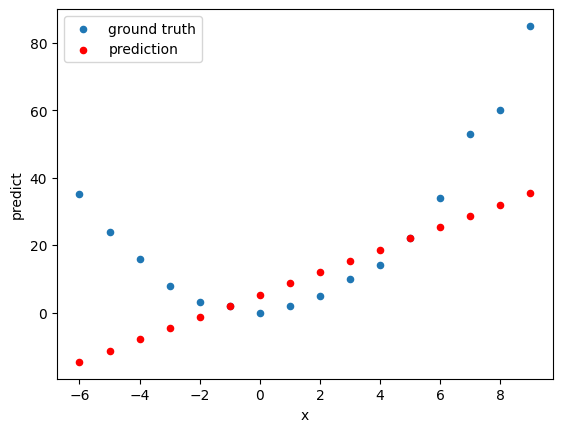

In [38]:
from sklearn.svm import LinearSVR
from sklearn.model_selection import GridSearchCV
df1 = pd.DataFrame({'x': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9], 'y': [1, 3, 2, 5, 7, 8, 8, 9, 10, 12]})
df1 = pd.DataFrame({'x': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, -1, -2, -3, -4, -5, -6], 'y': [0, 2, 5, 10, 14, 22, 34, 53, 60, 85, 2, 3, 8, 16, 24, 35]})
param_grid = {"C":[0.1,0.2,1],
             "loss":['epsilon_insensitive', 'squared_epsilon_insensitive']}
grid = GridSearchCV(LinearSVR(), param_grid, cv = 2, verbose = 3) 
grid.fit(df1[["x"]], df1["y"])
print(grid.best_params_) 
df1["predict"] = grid.predict(df1[["x"]])
ax = df1.plot(x="x",y="y", kind= "scatter", label = "ground truth")
df1.plot(x="x",y="predict", kind= "scatter", ax = ax, color = "r", label = "prediction")